In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs       # ccrs contains information about projections
import cartopy                   # contains all other cartopy functions/classes/methods
import cartopy.feature as cfeature
import os

In [2]:
indir='/shared/marn5895/data/GrahamJosieProject/yrly_outputs/'

In [3]:
data=xr.open_mfdataset(indir+'*.nc', concat_dim='time')

In [4]:
decade=data.mean(dim=('time'))

In [6]:
decade

<xarray.Dataset>
Dimensions:    (longitude: 1201, latitude: 481, depth: 1)
Coordinates:
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * depth      (depth) float32 15.0
Data variables:
    u          (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>
    v          (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>
    um         (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>
    vm         (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>
    dvdy       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>
    dudx       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>
    conv       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>
    vort       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 481, 1201), meta=np.ndarray>

/home/jlm21009/miniconda/envs/marn5895/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


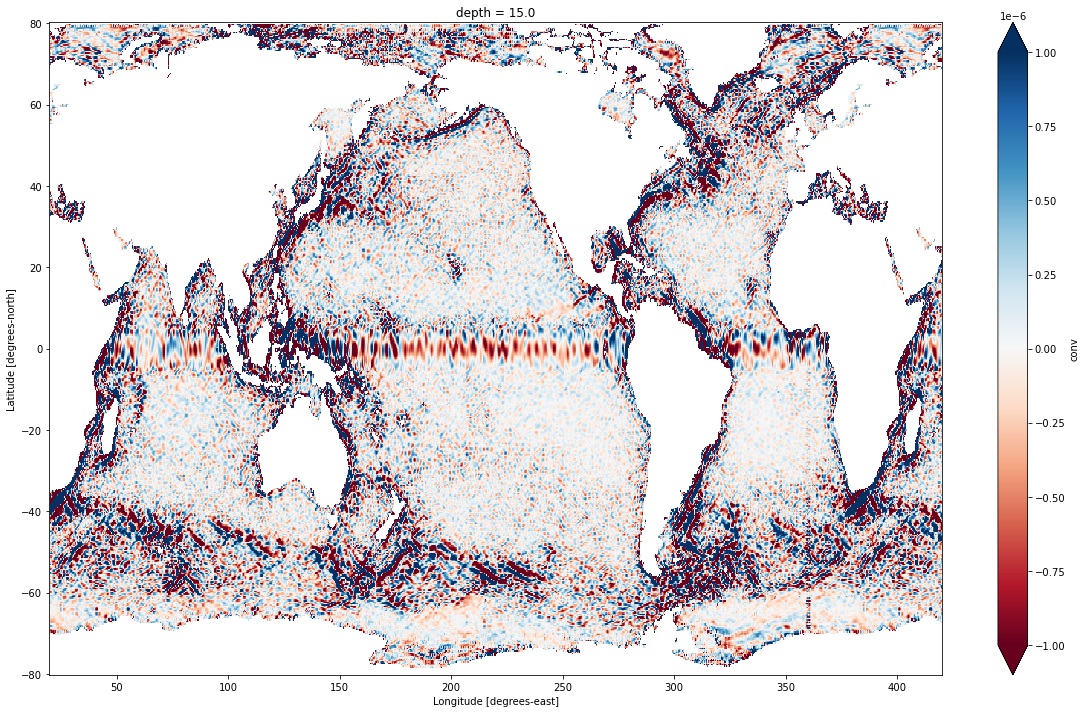

In [5]:
fig, axes = plt.subplots( figsize=(20,12))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent(regional_extent)
cmap='RdBu'
decade.conv[0].plot.pcolormesh(ax=axes, vmin=-0.000001, vmax=0.000001, cmap=cmap)

#blue=divergence
#red=convergence

In [5]:
y=np.arange(-80,81)#,2)
x=np.arange(20,421)#,10)

In [6]:
#aggregate 1 degree grid
decaderi=decade.reindex(latitude=y, longitude=x, method='nearest')

In [7]:
decaderi

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 401, depth: 1)
Coordinates:
  * latitude   (latitude) int64 -80 -79 -78 -77 -76 -75 ... 75 76 77 78 79 80
  * longitude  (longitude) int64 20 21 22 23 24 25 ... 415 416 417 418 419 420
  * depth      (depth) float32 15.0
Data variables:
    u          (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>
    v          (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>
    um         (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>
    vm         (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>
    dvdy       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>
    dudx       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>
    conv       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>
    vort       (depth, latitude, longitude) float64 dask.array<chunksize=(1, 161, 401), meta=np.ndarray>

/home/jlm21009/miniconda/envs/marn5895/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


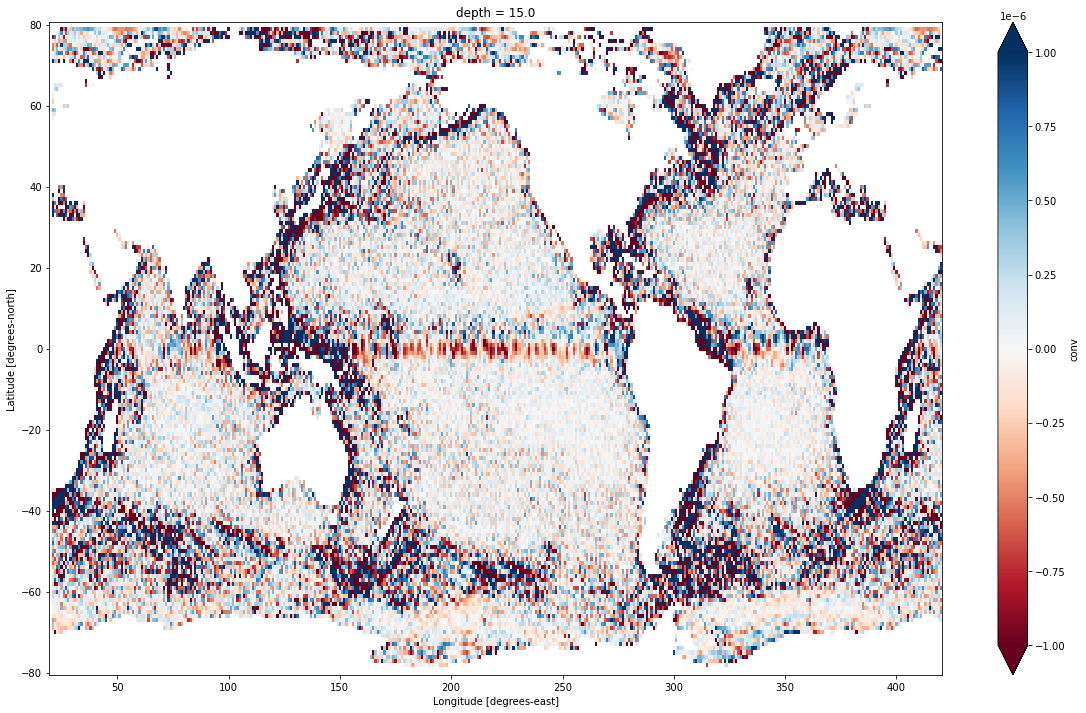

In [8]:
fig, axes = plt.subplots( figsize=(20,12))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent(regional_extent)
cmap='RdBu'
decaderi.conv[0].plot.pcolormesh(ax=axes, vmin=-0.000001, vmax=0.000001, cmap=cmap)

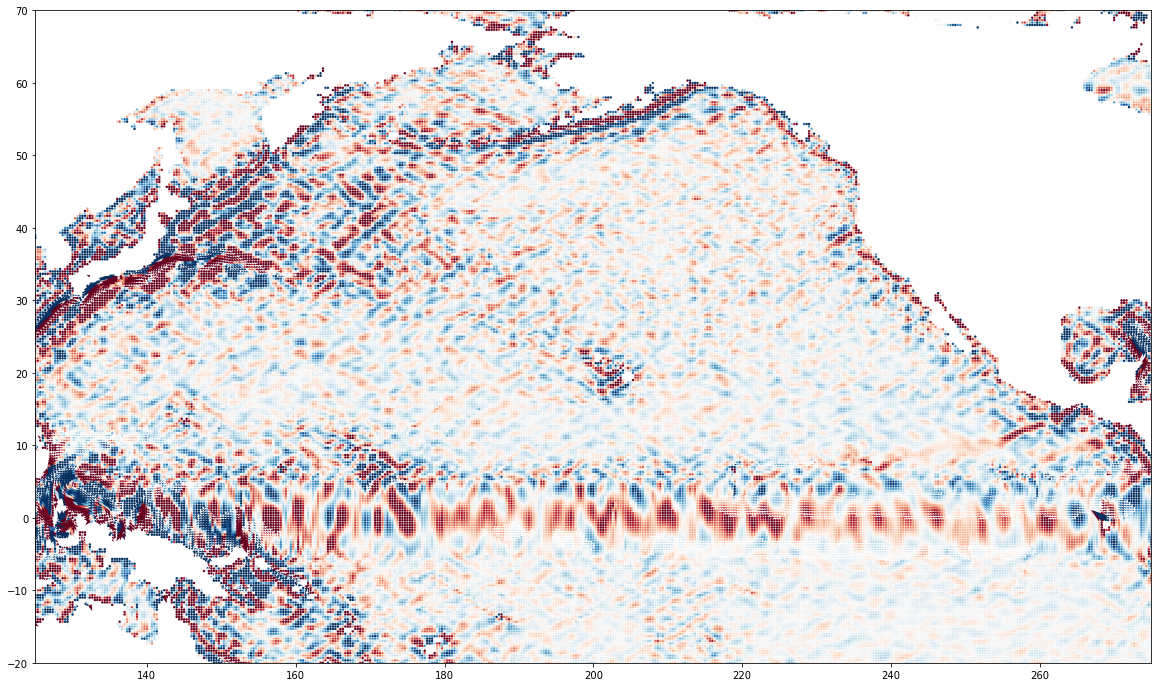

In [58]:
#Quiver plot of Convergence
regional_extent= [125, 250, -20, 77]

fig, axes = plt.subplots( figsize=(20,12))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent(regional_extent)

X, Y = decade.longitude, decade.latitude
#X, Y = np.meshgrid(decade.longitude[::5], decade.latitude[::5])
u = decade.u[0]
v = decade.v[0]

kw = {
    'cmap':'RdBu',
}

plt.quiver(X, Y, u, v, decade.conv, **kw)
plt.xlim(125,275)
plt.ylim(-20,70)
plt.clim(-0.000001,0.000001)

#scale=0.5, units='xy'
#plt.quiver(X[::5], Y[::5], u[::5], v[::5], decade.conv[0], **kw) #trying to get fewer arrows...


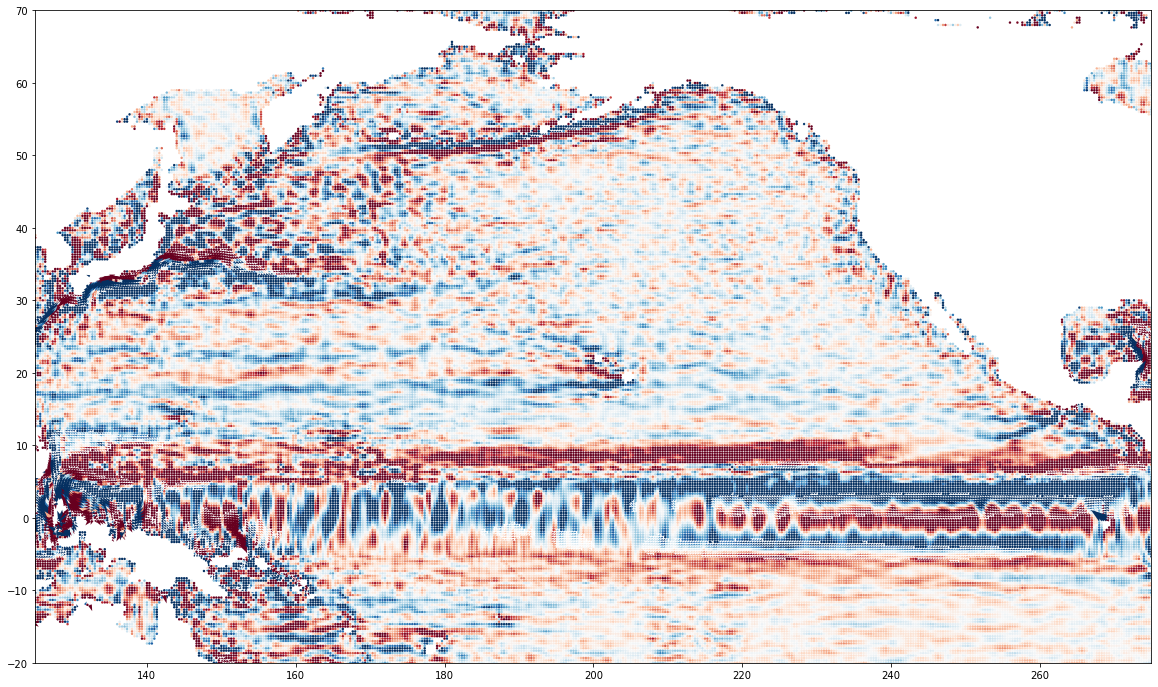

In [59]:
#Quiver plot of vorticity
regional_extent= [125, 250, -20, 77]

fig, axes = plt.subplots( figsize=(20,12))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent(regional_extent)

X, Y = decade.longitude, decade.latitude
u = decade.u[0]
v = decade.v[0]

kw = {
    'cmap':'RdBu',
}

plt.quiver(X, Y, u, v, decade.vort, **kw)
plt.xlim(125,275)
plt.ylim(-20,70)
plt.clim(-0.000001,0.000001)

In [6]:
#aggregate 5 degree grid
y=np.arange(-80,81,5)
x=np.arange(20,421,5)

decaderv=decade.reindex(latitude=y, longitude=x, method='nearest')

/home/jlm21009/miniconda/envs/marn5895/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


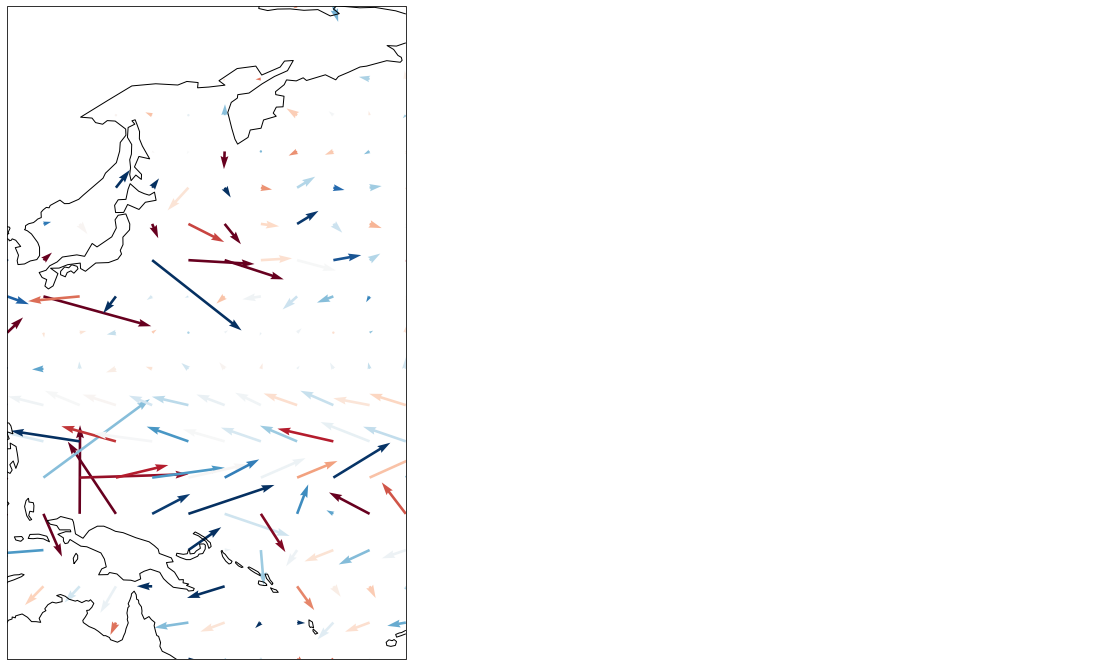

In [7]:
#trying to get fewer arrows
regional_extent= [125, 250, -20, 77] #this needs to be changed, it should be -180 to 180 instead of 0 to 420

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(regional_extent)
ax.coastlines()

X, Y = np.meshgrid(decaderv.longitude, decaderv.latitude)
u = decaderv.u[0]
v = decaderv.v[0]

kw = {
    'cmap':'RdBu',
}

plt.quiver(X, Y, u, v, decaderv.conv[0], transform=ccrs.PlateCarree(),zorder=0, **kw, scale=0.025, units='xy')
plt.xlim(125,275)
plt.ylim(-20,70)
plt.clim(-0.000001,0.000001)

#scale=0.5, units='xy'
#plt.quiver(X[::5], Y[::5], u[::5], v[::5], decade.conv[0], **kw) #trying to get fewer arrows...
